In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="white")
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, normalize
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score
from matplotlib.backends.backend_pdf import PdfPages
#ML_Visuals = PdfPages('ML_Bank_Attr_Visualisation.pdf')

# Load csv as pandas frame and drop useless columns

file = r'RIA_ML_Data_Set.xlsx'
data = pd.read_excel(file)
df = pd.DataFrame(data) 
df.head()

C:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,CustomerId,CreditRating,Customer Address,Industry,CustomerSegment,Turnover,Established Date,DistanceToResidence,Tenure,NumOfProducts,...,No Of Transactions,% difference in balance amount for 6 Months,Payments made after due date,# of cancelled Bills in last 6 Months,# of cancelled Paymnets in last 6 Months,# of credit adjustments in last 6 Months,# of debit adjustments in last 6 Months,# of reversed/cancelled adjustments in last 6 Months,# of complains,Exit
0,C001,A,Cust_Addr_1,Manufaturing,Large_customer,12000000000,1995-01-22,High Proximity,2015-01-04,238,...,77,0.0546,7,8,9,7,8,6,42,No
1,C002,B,Cust_Addr_2,Services,Large_customer,11000050000,1995-02-12,High Proximity,2008-01-25,261,...,31,0.0684,8,9,1,8,4,7,17,No
2,C003,A,Cust_Addr_3,NBFI,Large_customer,9000100000,1995-03-05,Low Proximity,2008-02-15,284,...,5,0.0822,10,2,5,10,11,9,21,No
3,C004,A,Cust_Addr_4,Manufaturing,Large_customer,10000150000,1995-03-26,High Proximity,2010-03-08,307,...,90,0.0960,6,3,1,11,4,4,4,No
4,C005,B,Cust_Addr_5,Services,Large_customer,8000200000,1995-04-16,High Proximity,2015-03-29,330,...,30,0.1098,3,2,6,12,2,11,10,No


In [2]:
print('Shape' , df.shape)
print('Data Types')
print(df.dtypes)

Shape (75, 27)
Data Types
CustomerId                                                      object
CreditRating                                                    object
Customer Address                                                object
Industry                                                        object
CustomerSegment                                                 object
Turnover                                                         int64
Established Date                                        datetime64[ns]
DistanceToResidence                                             object
Tenure                                                  datetime64[ns]
NumOfProducts                                                    int64
Liquidity                                                        int64
Payments                                                         int64
Lending_Loan                                                     int64
Trade                                              

In [3]:
df.describe()

,Turnover,NumOfProducts,Liquidity,Payments,Lending_Loan,Trade,Insurance,Aggregate Balance,No Of Transactions,% difference in balance amount for 6 Months,Payments made after due date,# of cancelled Bills in last 6 Months,# of cancelled Paymnets in last 6 Months,# of credit adjustments in last 6 Months,# of debit adjustments in last 6 Months,# of reversed/cancelled adjustments in last 6 Months,# of complains
count,7.500000e+01,75.000000,75.000000,75.000000,7.500000e+01,7.500000e+01,7.500000e+01,7.500000e+01,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,2.743370e+09,216.746667,290.946667,23740.160000,1.767163e+06,2.492251e+06,1.315700e+06,2.898377e+06,46.560000,-0.161540,7.760000,7.280000,6.213333,7.733333,6.533333,5.973333,28.746667
std,3.906375e+09,174.635303,314.034681,23559.873434,1.871165e+06,1.968637e+06,9.748184e+05,2.446793e+06,56.891134,0.241731,4.798198,4.831093,4.256294,3.775216,3.922676,3.755980,21.342822
min,1.157500e+07,13.000000,2.000000,1120.000000,3.203000e+05,3.939690e+05,1.352995e+05,5.909535e+05,4.000000,-0.612900,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,2.205032e+08,67.000000,48.500000,6013.000000,7.007500e+05,1.046054e+06,7.389220e+05,1.111520e+06,6.000000,-0.428500,4.000000,3.000000,3.000000,6.500000,3.000000,1.000000,11.000000
50%,7.281002e+08,146.000000,90.000000,11061.000000,9.103000e+05,1.861738e+06,1.232460e+06,1.573047e+06,31.000000,-0.053109,8.000000,8.000000,4.000000,8.000000,8.000000,7.000000,21.000000
75%,5.500325e+09,363.000000,682.500000,36001.500000,2.301850e+06,3.493784e+06,1.494460e+06,4.246175e+06,61.000000,0.053450,10.000000,11.000000,10.000000,11.000000,10.000000,9.000000,44.000000
max,1.200000e+10,607.000000,800.000000,97017.000000,9.402600e+06,7.864198e+06,4.428738e+06,1.020719e+07,308.000000,0.109800,23.000000,20.000000,14.000000,17.000000,13.000000,11.000000,88.000000


In [4]:
from datetime import datetime
from dateutil import relativedelta
from datetime import date

today = date.today()

def calculate_age(dtob):
    today=date.today()
    delta= relativedelta.relativedelta(today,dtob)
    return (round((delta.years+(delta.months/12)), 2))

In [5]:
establish_age=df['Established Date'].dt.date
Age = [0] * len(establish_age)
for  i in range(0,len(establish_age)):
    Age[i]=calculate_age(establish_age[i])
df['Age']= Age
df=df.drop(['Established Date'], axis = 1)

In [6]:
Tenure=df['Tenure'].dt.date
Tenure_ = [0] * len(Tenure)
for  i in range(0,len(Tenure)):
    Tenure_[i]=calculate_age(Tenure[i])
df['Tenure_']=Tenure_
df=df.drop(['Tenure'], axis = 1)

In [7]:
print('Data Types Object -Unique')
print(df['CreditRating'].unique())
print(df['Industry'].unique())
print(df['CustomerSegment'].unique())
print(df['HasCrCard'].unique())
print(df['DistanceToResidence'].unique())
print(df['Exit'].unique())

Data Types Object -Unique
['A' 'B' 'C']
['Manufaturing' 'Services' 'NBFI']
['Large_customer' 'Small_customer' 'Mid_customer']
['Yes' 'No']
['High Proximity' 'Low Proximity' 'Medium Proximity']
['No' 'Yes']


In [8]:
# converts categorical features to integers

def label_encoder(data_: df, columns_name_: list):
    le = LabelEncoder()
    for i in columns_name_:
        le.fit(data_[i])
        data_[i] = le.transform(data_[i])
    return data_

In [9]:
df.head(10)

,CustomerId,CreditRating,Customer Address,Industry,CustomerSegment,Turnover,DistanceToResidence,NumOfProducts,Liquidity,Payments,...,Payments made after due date,# of cancelled Bills in last 6 Months,# of cancelled Paymnets in last 6 Months,# of credit adjustments in last 6 Months,# of debit adjustments in last 6 Months,# of reversed/cancelled adjustments in last 6 Months,# of complains,Exit,Age,Tenure_
0,C001,A,Cust_Addr_1,Manufaturing,Large_customer,12000000000,High Proximity,238,700,36000,...,7,8,9,7,8,6,42,No,25.67,5.75
1,C002,B,Cust_Addr_2,Services,Large_customer,11000050000,High Proximity,261,750,23000,...,8,9,1,8,4,7,17,No,25.67,12.67
2,C003,A,Cust_Addr_3,NBFI,Large_customer,9000100000,Low Proximity,284,800,10000,...,10,2,5,10,11,9,21,No,25.58,12.67
3,C004,A,Cust_Addr_4,Manufaturing,Large_customer,10000150000,High Proximity,307,120,67000,...,6,3,1,11,4,4,4,No,25.50,10.58
4,C005,B,Cust_Addr_5,Services,Large_customer,8000200000,High Proximity,330,154,48500,...,3,2,6,12,2,11,10,No,25.50,5.50
5,C006,C,Cust_Addr_6,NBFI,Large_customer,10000250000,High Proximity,353,129,6000,...,8,9,1,8,9,7,22,No,22.42,8.50
6,C007,A,Cust_Addr_7,Manufaturing,Large_customer,7000300000,High Proximity,214,70,66100,...,9,4,3,4,4,8,11,No,25.33,6.42
7,C008,B,Cust_Addr_8,Services,Large_customer,4000350000,High Proximity,399,10,3200,...,5,2,3,10,11,9,11,No,22.33,6.33
8,C009,B,Cust_Addr_9,NBFI,Large_customer,7000400000,Low Proximity,422,15,4000,...,4,7,1,2,12,10,11,No,25.25,4.25
9,C010,A,Cust_Addr_10,Manufaturing,Large_customer,9000450000,High Proximity,76,683,36017,...,7,8,9,7,8,6,11,No,25.17,4.58


In [10]:

df = label_encoder(df, ['CreditRating'])
df = label_encoder(df, ['DistanceToResidence'])
df = label_encoder(df, ['HasCrCard'])
df = label_encoder(df, ['Exit'])


In [11]:
df.head(10)

,CustomerId,CreditRating,Customer Address,Industry,CustomerSegment,Turnover,DistanceToResidence,NumOfProducts,Liquidity,Payments,...,Payments made after due date,# of cancelled Bills in last 6 Months,# of cancelled Paymnets in last 6 Months,# of credit adjustments in last 6 Months,# of debit adjustments in last 6 Months,# of reversed/cancelled adjustments in last 6 Months,# of complains,Exit,Age,Tenure_
0,C001,0,Cust_Addr_1,Manufaturing,Large_customer,12000000000,0,238,700,36000,...,7,8,9,7,8,6,42,0,25.67,5.75
1,C002,1,Cust_Addr_2,Services,Large_customer,11000050000,0,261,750,23000,...,8,9,1,8,4,7,17,0,25.67,12.67
2,C003,0,Cust_Addr_3,NBFI,Large_customer,9000100000,1,284,800,10000,...,10,2,5,10,11,9,21,0,25.58,12.67
3,C004,0,Cust_Addr_4,Manufaturing,Large_customer,10000150000,0,307,120,67000,...,6,3,1,11,4,4,4,0,25.50,10.58
4,C005,1,Cust_Addr_5,Services,Large_customer,8000200000,0,330,154,48500,...,3,2,6,12,2,11,10,0,25.50,5.50
5,C006,2,Cust_Addr_6,NBFI,Large_customer,10000250000,0,353,129,6000,...,8,9,1,8,9,7,22,0,22.42,8.50
6,C007,0,Cust_Addr_7,Manufaturing,Large_customer,7000300000,0,214,70,66100,...,9,4,3,4,4,8,11,0,25.33,6.42
7,C008,1,Cust_Addr_8,Services,Large_customer,4000350000,0,399,10,3200,...,5,2,3,10,11,9,11,0,22.33,6.33
8,C009,1,Cust_Addr_9,NBFI,Large_customer,7000400000,1,422,15,4000,...,4,7,1,2,12,10,11,0,25.25,4.25
9,C010,0,Cust_Addr_10,Manufaturing,Large_customer,9000450000,0,76,683,36017,...,7,8,9,7,8,6,11,0,25.17,4.58


In [12]:
'''
Industry = pd.get_dummies(df.Industry)
df = pd.concat([df, Industry], axis=1)

Cust_Seg = pd.get_dummies(df.CustomerSegment)
df = pd.concat([df, Cust_Seg], axis=1)
'''

'\nIndustry = pd.get_dummies(df.Industry)\ndf = pd.concat([df, Industry], axis=1)\n\nCust_Seg = pd.get_dummies(df.CustomerSegment)\ndf = pd.concat([df, Cust_Seg], axis=1)\n'

In [13]:
df=pd.get_dummies(df,columns=['Industry','CustomerSegment'],drop_first=True)

<AxesSubplot:>

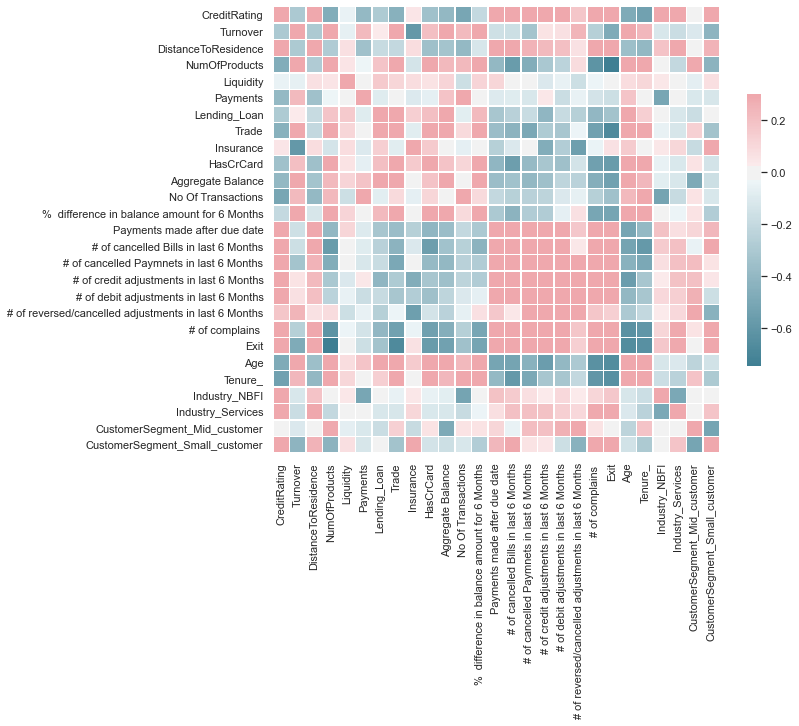

In [14]:
# correlation table

corr = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=None, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [15]:
df.head(1)

,CustomerId,CreditRating,Customer Address,Turnover,DistanceToResidence,NumOfProducts,Liquidity,Payments,Lending_Loan,Trade,...,# of debit adjustments in last 6 Months,# of reversed/cancelled adjustments in last 6 Months,# of complains,Exit,Age,Tenure_,Industry_NBFI,Industry_Services,CustomerSegment_Mid_customer,CustomerSegment_Small_customer
0,C001,0,Cust_Addr_1,12000000000,0,238,700,36000,700000,3135300,...,8,6,42,0,25.67,5.75,0,0,0,0


In [16]:
df.iloc[:, 16:20]

,# of cancelled Bills in last 6 Months,# of cancelled Paymnets in last 6 Months,# of credit adjustments in last 6 Months,# of debit adjustments in last 6 Months
0,8,9,7,8
1,9,1,8,4
2,2,5,10,11
3,3,1,11,4
4,2,6,12,2
...,...,...,...,...
70,2,3,1,2
71,2,3,1,2
72,3,4,2,3
73,3,4,2,3


In [17]:
# As all the cancllaions are highly corellated we decide to merge them into a column called cancellation
df.loc[:,'Cancellations'] = df.iloc[:,16:22].sum(axis=1)



In [18]:

df=df.drop(['# of cancelled Bills in last 6 Months','# of cancelled Paymnets in last 6 Months','# of credit adjustments in last 6 Months','# of debit adjustments in last 6 Months','# of reversed/cancelled adjustments in last 6 Months'], axis = 1)


In [19]:
df['Exited']=df['Exit']

In [20]:
#We removed Customer ID ,Customer Address
df=df.drop(['Customer Address','CustomerId','Exit'], axis = 1)


In [21]:
df= df.rename(columns={'Exited': 'Exit'})

In [22]:
df.head()

,CreditRating,Turnover,DistanceToResidence,NumOfProducts,Liquidity,Payments,Lending_Loan,Trade,Insurance,HasCrCard,...,Payments made after due date,# of complains,Age,Tenure_,Industry_NBFI,Industry_Services,CustomerSegment_Mid_customer,CustomerSegment_Small_customer,Cancellations,Exit
0,0,12000000000,0,238,700,36000,700000,3135300,135299.5,1,...,7,42,25.67,5.75,0,0,0,0,80,0
1,1,11000050000,0,261,750,23000,800000,4135669,135668.5,1,...,8,17,25.67,12.67,0,1,0,0,46,0
2,0,9000100000,1,284,800,10000,1000000,5136038,136037.5,1,...,10,21,25.58,12.67,1,0,0,0,58,0
3,0,10000150000,0,307,120,67000,700000,3136407,136406.5,1,...,6,4,25.50,10.58,0,0,0,0,27,0
4,1,8000200000,0,330,154,48500,850000,4136776,136775.5,1,...,3,10,25.50,5.50,0,1,0,0,43,0


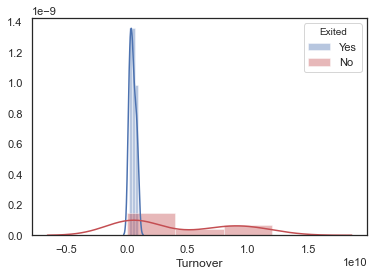

In [23]:
# Attributes distribution with respect to Prediction factor

ax=plt.figure()
ax=sns.distplot(data[df['Exit'] == 1]['Turnover'], color = 'b',label='Yes')
ax=sns.distplot(data[df['Exit'] == 0]['Turnover'], color = 'r',label='No')

ax.legend(title='Exited')
#ML_Visuals.savefig()


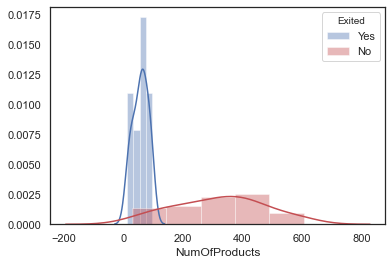

In [24]:

ax=sns.distplot(data[df['Exit'] == 1]['NumOfProducts'], color = 'b',label='Yes')
ax=sns.distplot(data[df['Exit'] == 0]['NumOfProducts'], color = 'r',label='No')
ax.legend(title='Exited')
#ML_Visuals.savefig()


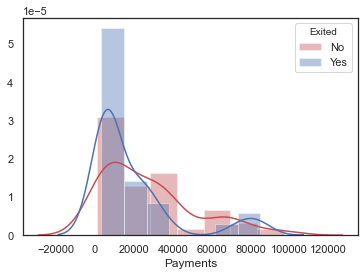

In [25]:
ax=sns.distplot(data[df['Exit'] == 0]['Payments'], color='r',label="No")
ax=sns.distplot(data[df['Exit'] == 1]['Payments'], color = 'b',label="Yes")
ax.legend(title='Exited')
#ML_Visuals.savefig()



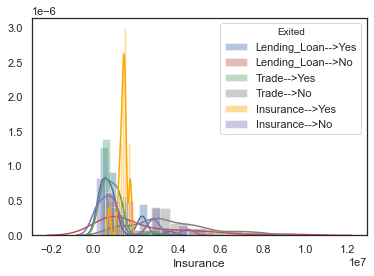

In [26]:
ax=sns.distplot(data[df['Exit'] == 1]['Lending_Loan'], color = 'b',label="Lending_Loan-->Yes")
ax=sns.distplot(data[df['Exit'] == 0]['Lending_Loan'], color = 'r',label="Lending_Loan-->No")
ax=sns.distplot(data[df['Exit'] == 1]['Trade'], color = 'g',label="Trade-->Yes")
ax=sns.distplot(data[df['Exit'] == 0]['Trade'], color = 'grey',label="Trade-->No")
ax=sns.distplot(data[df['Exit'] == 1]['Insurance'], color = 'orange',label="Insurance-->Yes")
ax=sns.distplot(data[df['Exit'] == 0]['Insurance'], color = 'm',label="Insurance-->No")
ax.legend(title='Exited')
#ML_Visuals.savefig()


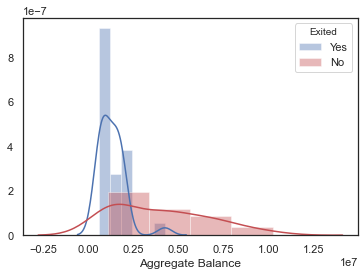

In [27]:

ax=sns.distplot(data[df['Exit'] == 1]['Aggregate Balance'], color = 'b',label='Yes')
ax=sns.distplot(data[df['Exit'] == 0]['Aggregate Balance'], color = 'r',label='No')
ax.legend(title='Exited')
#ML_Visuals.savefig()


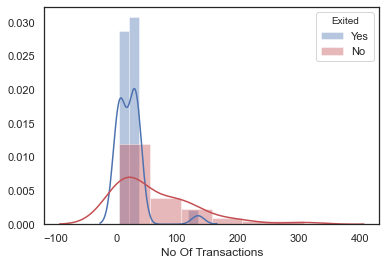

In [28]:

ax=sns.distplot(data[df['Exit'] == 1]['No Of Transactions'], color = 'b',label='Yes' )
ax=sns.distplot(data[df['Exit'] == 0]['No Of Transactions'], color = 'r',label='No' )
ax.legend(title='Exited')
#ML_Visuals.savefig()


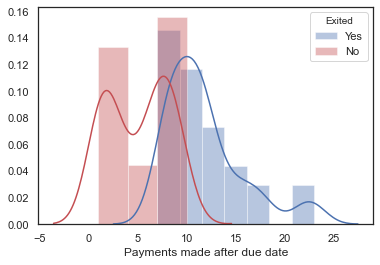

In [29]:


ax=sns.distplot(data[df['Exit'] == 1]['Payments made after due date'], color = 'b',label='Yes' )
ax=sns.distplot(data[df['Exit'] == 0]['Payments made after due date'], color = 'r',label='No' )
ax.legend(title='Exited')
#ML_Visuals.savefig()


[Text(0.5, 1.0, 'Years In Bank ')]

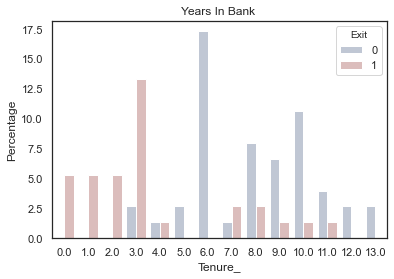

In [30]:

ax=sns.barplot(x=round(df.Tenure_),y=round(df.Tenure_),data=df,hue="Exit", palette="vlag",estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Years In Bank")
ax.set(ylabel="Percentage")
ax.set(title="Years In Bank ")
#ML_Visuals.savefig()

[Text(0, 0.5, 'Percentage')]

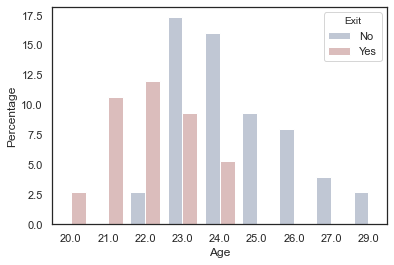

In [31]:


#ax=plt.figure(figsize=(10,5))
ax=sns.barplot(x=round(df.Age),y=round(df.Age),data=data,hue="Exit", palette="vlag" ,estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Age")
ax.set(ylabel="Percentage")
#ax.set(title="Age ")
#ML_Visuals.savefig()


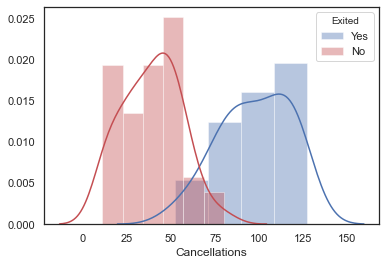

In [32]:
ax=sns.distplot(df[df['Exit'] == 1]['Cancellations'], color = 'b',label='Yes' )
ax=sns.distplot(df[df['Exit'] == 0]['Cancellations'], color = 'r',label='No' )
ax.legend(title='Exited')
#ML_Visuals.savefig()

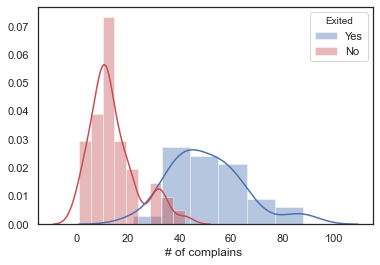

In [33]:
ax=sns.distplot(df[df['Exit'] == 1]['# of complains '], color = 'b',label='Yes' )
ax=sns.distplot(df[df['Exit'] == 0]['# of complains '], color = 'r',label='No' )
ax.legend(title='Exited')
#ML_Visuals.savefig()

Text(0, 0.5, 'Count')

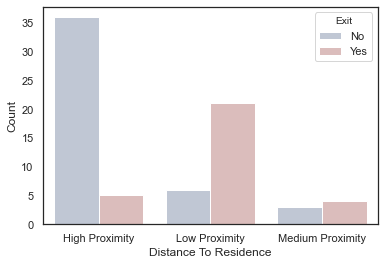

In [34]:

#ax=plt.figure(figsize=(10,8))
ax=sns.countplot(x="DistanceToResidence",hue="Exit" ,palette="vlag",data=data)
ax.set_xlabel("Distance To Residence"),
ax.set_ylabel("Count")
#ax.set_title("Distance To Residence Count")
#ML_Visuals.savefig()

Text(0, 0.5, 'Count')

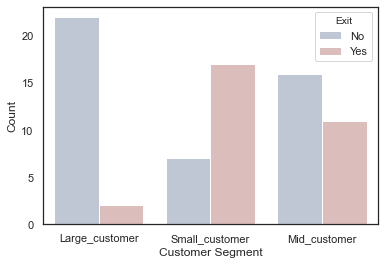

In [35]:


#ax=plt.figure(figsize=(8,7))
ax=sns.countplot(x="CustomerSegment",hue="Exit",palette="vlag" ,data=data)
ax.set_xlabel("Customer Segment")
ax.set_ylabel("Count")
#ax.set_title("Customer Segment Count")  
#ML_Visuals.savefig()


Text(0, 0.5, 'Count')

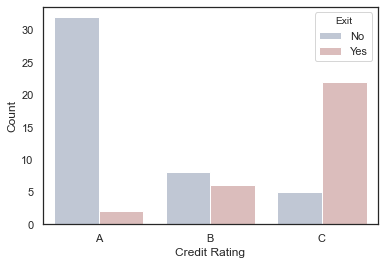

In [36]:


ax=sns.countplot(x="CreditRating",hue="Exit",palette="vlag",data=data)
ax.set_xlabel("Credit Rating")
ax.set_ylabel("Count")
#ML_Visuals.savefig()

In [37]:
from sklearn.model_selection import train_test_split
x=df.iloc[:, :-1]
y=df['Exit']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.05, random_state = 42)

In [38]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x_train,y_train)

C:\Anaconda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [39]:
print(model.feature_importances_)

[0.08977659 0.03174706 0.         0.20986113 0.         0.
 0.         0.01088123 0.01028442 0.01214423 0.         0.
 0.         0.027681   0.33897002 0.02113095 0.         0.
 0.         0.         0.01806678 0.22945659]


<function matplotlib.pyplot.show(close=None, block=None)>

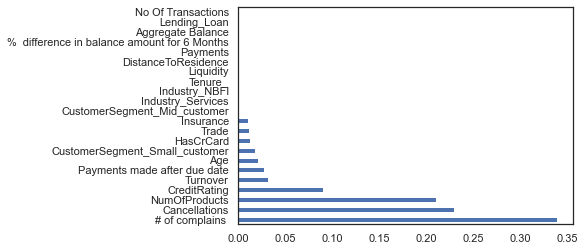

In [40]:
fet_imp=pd.Series(model.feature_importances_,index=x_test.columns)
fet_imp.nlargest(23).plot(kind='barh')
plt.show

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(x_train,y_train)

print("Accuracy of Random Forest Algo: ", rf.score(x_test,y_test))

Accuracy of Random Forest Algo:  1.0


In [42]:
final_score={}
final_score['Random Forest'] = rf.score(x_test,y_test)
final_score

{'Random Forest': 1.0}

In [43]:
predictions=rf.predict(x_test)

C:\Anaconda\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<AxesSubplot:xlabel='Exit'>

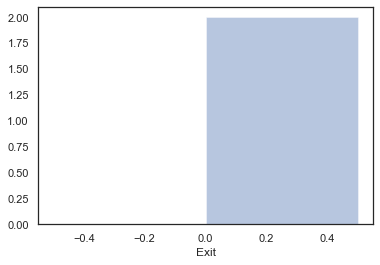

In [44]:
sns.distplot(y_test-predictions)

In [45]:

import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')


# dump information to that file
pickle.dump(rf, file)

In [46]:
model = open('random_forest_regression_model.pkl','rb')
forest = pickle.load(model)

In [47]:
y_prediction = forest.predict(x_test)

In [48]:
x=[[0, 2.0, 0, 2, 2.0, 2.0, 2.0, 2.0, 2.0, 0, 2.0, 2, 2.0, 2, 2, 28.75, 19.75, 0, 0, 0, 0, 10]]

In [49]:
y=forest.predict(x)

In [50]:
y_prediction

array([0, 0, 1, 0])

In [51]:
y

array([0])

In [52]:
list(x_test.columns.values.tolist()) 

['CreditRating',
 'Turnover',
 'DistanceToResidence',
 'NumOfProducts',
 'Liquidity',
 'Payments',
 'Lending_Loan',
 'Trade',
 'Insurance',
 'HasCrCard',
 'Aggregate Balance',
 'No Of Transactions',
 '%  difference in balance amount for 6 Months',
 'Payments made after due date',
 '# of complains ',
 'Age',
 'Tenure_',
 'Industry_NBFI',
 'Industry_Services',
 'CustomerSegment_Mid_customer',
 'CustomerSegment_Small_customer',
 'Cancellations']